<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/day2_hw_%EC%86%A1%EC%9B%90%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Day2 과제</h1>


# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Data load 및 미리보기
* `load_wine()` 함수로 wine 등급 분류 데이터를 로드합니다.
* Pandas의 DataFrame을 생성해서 미리보기 합니다.
  * target 컬럼에 wine.target 값을 표시
  * class 컬럼에 target 컬럼의 이름을 표시

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df['class'] = wine.target_names[wine.target]
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


# train, test set 분할
* wine 데이터를 train set과 test set으로 분할 합니다.
* 분할 비율은 0.75:0.25
* `random_state=0`

In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)


# 표준화 및 KNN 학습
* `StandardScaler` 로 표준화 합니다.
* `KNeighborsClassifier` 기본 생성자로 학습합니다.
* test set로 정확도를 출력합니다.

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(scaled_train, y_train)
y_proba = knn.predict_proba(scaled_test)
acc = knn.score(scaled_test, y_test)
print('acc:', acc)

acc: 0.9777777777777777


# AUC Curve, Score
* wine의 각 품종별 AUC Curve와 score를 표시합니다.

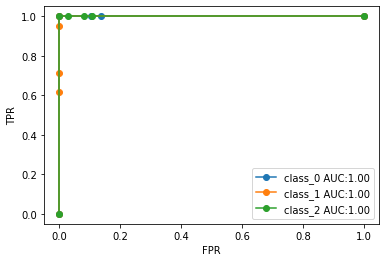

In [8]:
plt.xlabel('FPR')
plt.ylabel('TPR')
for i, target_name in enumerate(wine.target_names):
  fpr, tpr, thresh = roc_curve(y_test, y_proba[:, i], pos_label=i)
  score = auc(fpr, tpr)
  plt.plot(fpr, tpr, marker='o', label=f'{target_name} AUC:{score:.2f}')
_ = plt.legend()